In [143]:
import pandas as pd
import numpy as np
from collections import Counter

def generate_192_categ_names():
    bases = 'ACGT'
    names = list()
    for base in range(0,4):
        for left in range(0,4):
            for right in range(0,4):
                for to in range(0,4):
                    if base==to: 
                        continue
                    names.append(bases[left]+ '(' +bases[base]+ '->' +bases[to] +')' +bases[right])
    return names

def generate_192_categ_set():
    names = generate_192_categ_names()
    C192 = pd.DataFrame(index =[range(0,192)], columns=['left','base','newbase','right'])
    for ix,s in enumerate(names):
        C192['left'][ix] = names[ix][0]
        C192['right'][ix] = names[ix][-1]
        C192['base'][ix] = names[ix][2]
        C192['newbase'][ix] = names[ix][5]
    return C192  

def generate_96_categ_names():
    return generate_192_categ_set().iloc[0:96]

def generate_lego_matrix(p_maf):
    lego = np.zeros([8,12])
    left_order = ['T','C','A','G']
    right_order = ['G','A','C','T']    
    base_order = ['C','A',
                  'G','T']
    newbase_order = ['T','A','G','C']
    newbase_index = [[0,1,2],[0,2,1]]
    left_i=map(left_order.index,p_maf['left'].values)
    right_i=map(left_order.index,p_maf['right'].values)
    base_i =np.mod(map(base_order.index,p_maf['ref_allele'].values),2)
    newbase_ = np.mod(map(newbase_order.index,p_maf['newbase'].values),3)
    newbase_i = [newbase_index[i[0]][i[1]] for i in zip(base_i,newbase_)]
    count = Counter(list(zip(base_i*4+left_i,np.multiply(newbase_i,4)+right_i)))
    for i in count.iteritems():
        lego[i[0]] = i[1]
    return lego
def annotate_pcawg_maf_lr(pcawg_maf):
    pcawg_maf.loc[:,('left')] = C96['left'].iloc[cat_maf['chan96'].values-1].values
    pcawg_maf.loc[:,('right')] = C96['right'].iloc[cat_maf['chan96'].values-1].values
    
def __broken_lego_plot(lego):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ix = 1
    xs = np.arange(4)
    for c, z in zip(['y', 'c', 'r', 'g','b','m'], [4, 8, 12,4,8,12]):
        if c == 'g':
            xs = np.arange(4,8)
        ys = lego[xs[0]:xs[3],z-4:4]

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
        cs = [c] * len(xs)
        cs[0] = 'c'
        ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    plt.show()


In [54]:
C192 = generate_192_categ_set()
C96 = generate_96_categ_names()

In [31]:
cat_maf = pd.read_csv('~/PCAWG_october_release.chan96.maf',sep='\t')

In [55]:
annotate_pcawg_maf_lr(cat_maf)


In [57]:
p_maf = cat_maf[cat_maf['patient'] == 'b243adb4-b3e7-4e0e-bc0d-625aa8dbb1be']

In [200]:
    left_order = ['T','C','A','G']
    right_order = ['G','A','C','T']    
    base_order = ['C','A',
                  'G','T']
    newbase_order = ['T','A','G','C']
    newbase_index = [[0,1,2],[0,2,1]]

In [251]:
left_i=map(left_order.index,p_maf['left'].values)
right_i=map(left_order.index,p_maf['right'].values)
base_i =np.mod(map(base_order.index,p_maf['ref_allele'].values),2)
newbase_ = np.mod(map(newbase_order.index,p_maf['newbase'].values),3)
newbase_i = [newbase_index[i[0]][i[1]] for i in zip(base_i,newbase_)]

In [112]:
np.mod(range(0,12),3)

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [228]:
np.array(base_i*4+left_i,newbase_i*4+right_i).T

TypeError: data type not understood

In [252]:
x = base_i*4+left_i
y = newbase_i*4+right_i

In [253]:
count = Counter(list(zip(base_i*4+left_i,np.multiply(newbase_i,4)+right_i)))

In [254]:
lego = np.zeros([8,12])
for i in count.iteritems():
    lego[i[0]] = i[1]

In [255]:
import matplotlib.pyplot as plt
%matplotlib inline

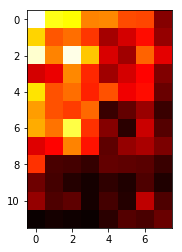

In [256]:
plt.imshow(lego.T,cmap='hot')
plt.show()

In [250]:
zip(left_i,right_i)

[(3, 3),
 (1, 1),
 (0, 0),
 (1, 1),
 (3, 3),
 (3, 3),
 (2, 2),
 (1, 1),
 (3, 3),
 (2, 2),
 (0, 0),
 (1, 1),
 (3, 3),
 (2, 2),
 (3, 3),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (3, 3),
 (0, 0),
 (1, 1),
 (3, 3),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 1),
 (3, 3),
 (3, 3),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (3, 3),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (3, 3),
 (3, 3),
 (0, 0),
 (3, 3),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (3, 3),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (3, 3),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (3, 3),
 (1, 1),
 (1, 1),
 (3, 3),
 (2, 2),
 (0, 0),
 (3, 3),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (3, 3),
 (1, 1),
 (3, 3),
 (0, 0),
 (3, 3),
 (3, 3),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (3, 3),
 (0, 0),
 (0, 0),
 (3, 3),
 (2, 2),
 (0, 0),
 (3, 3),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (3, 3),
 (3, 3),
 (2, 2),
 (2, 2),
 

In [243]:
np.multiply(newbase_i,4)

array([4, 0, 0, ..., 8, 4, 0])

In [211]:
newbase_index[base_i][newbase_i]

TypeError: only integer scalar arrays can be converted to a scalar index

In [216]:
newbase_index[base_i.astype(int)]

TypeError: only integer scalar arrays can be converted to a scalar index

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,


TypeError: only size-1 arrays can be converted to Python scalars

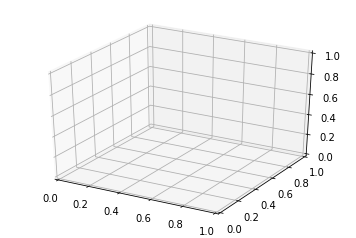

In [288]:
np.arange(4,8)

array([4, 5, 6, 7])

In [267]:
np.arange(0,8).shape

(8,)